In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [14, 7]

In [137]:
def NegImg(img:np.ndarray)->(np.ndarray):
    neg = 255-img
    return neg

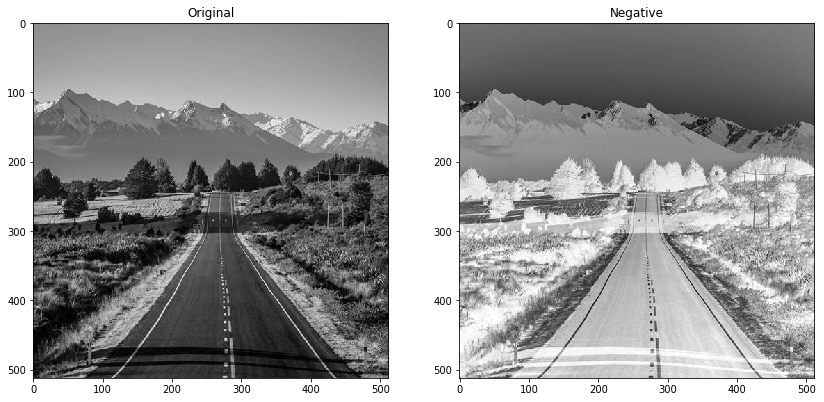

In [138]:
img = cv2.imread('images/road.jpg',0)
neg = NegImg(img)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(img,'gray')
a.set_title('Original')
a = fig.add_subplot(1,2,2)
plt.imshow(neg,'gray')
a.set_title('Negative')
plt.show()

### Log Transformation
The low intensity values in the input image are mapped to a wider range of output levels. The opposite is true for the higher values. <br>
<b>Applications</b>:<br>
Expands the dark pixels in the image while compressing the brighter pixels<br>
Compresses the dynamic range (display of Fourier transform).<br>
<img src="https://i2.wp.com/theailearner.com/wp-content/uploads/2019/01/log-1.png?w=507&ssl=1" alt="Graph" style="width: 400px; float: left;"/>

In [139]:
def LogImg(img:np.ndarray)->(np.ndarray):
    # Apply log transform
    img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
    # Specify the data type
    img_log = np.array(img_log,dtype=np.uint8)
    return img_log

d:\python\python36\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


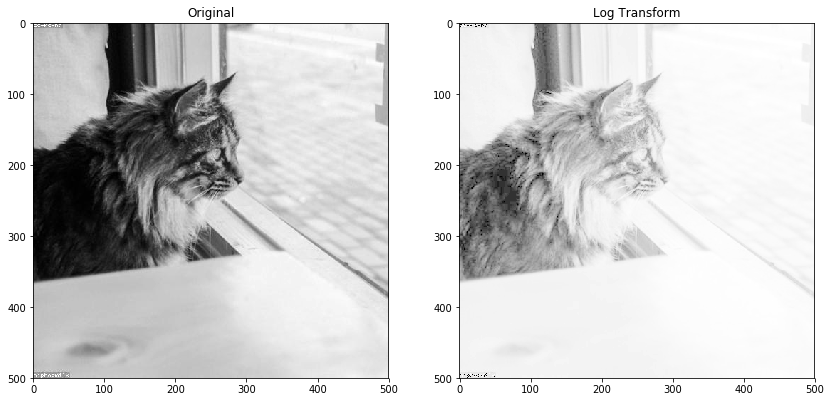

In [140]:
img = cv2.imread('images/cat.jpg',0)
log = LogImg(img)

fig = plt.figure()
a = fig.add_subplot(1,2,1)
plt.imshow(img,'gray')
a.set_title('Original')
a = fig.add_subplot(1,2,2)
plt.imshow(log,'gray')
a.set_title('Log Transform')
plt.show()

### Power Law Transformation
The general form of Power law (Gamma) transformation function is:<br>
s = c*rγ<br>
Where, ‘s’ and ‘r’ are the output and input pixel values, respectively and ‘c’ and γ are the positive constants.<br>
Like log transformation, power law curves with γ <1 map a narrow range of dark input values into a wider range of output values,<br>
with the opposite being true for higher input values. Similarly, for γ >1, we get the opposite result.<br>
This is also known as gamma correction, gamma encoding or gamma compression. Don’t get confused.<br>

<img src="https://i1.wp.com/theailearner.com/wp-content/uploads/2019/01/gamma.png?w=572&ssl=1" alt="Graph" style="width: 400px; float: left;"/>

In [141]:
def GammaImg(img:np.ndarray, gamma:float)->(np.ndarray):
    res = np.array(255*(img/255)**gamma,dtype='uint8')
    return res

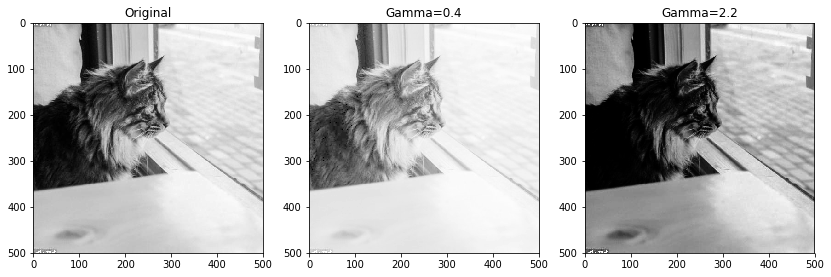

In [142]:
img = cv2.imread('images/cat.jpg',0)
gamma = np.array([0.4,2.2])
gam1 = GammaImg(img,gamma[0])
gam2 = GammaImg(img,gamma[1])

fig = plt.figure()
a = fig.add_subplot(1,3,1)
plt.imshow(img,'gray')
a.set_title('Original')
a = fig.add_subplot(1,3,2)
plt.imshow(gam1,'gray')
a.set_title('Gamma='+str(gamma[0]))
a = fig.add_subplot(1,3,3)
plt.imshow(gam2,'gray')
a.set_title('Gamma='+str(gamma[1]))
plt.show()